In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crux-ml-workshop-contest1/train.csv/train.csv
/kaggle/input/crux-ml-workshop-contest1/test.csv/test.csv
/kaggle/input/crux-ml-ws-2023-contest-1/sample_submission.csv
/kaggle/input/crux-ml-ws-2023-contest-1/train.csv
/kaggle/input/crux-ml-ws-2023-contest-1/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/crux-ml-ws-2023-contest-1/train.csv')

In [3]:
data.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,23122,37,Local-gov,217689,Some-college,10,Married-civ-spouse,Other-service,Husband,Amer-Indian-Eskimo,Male,0,0,32,United-States,<=50k
1,30555,30,Self-emp-not-inc,182089,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,85,United-States,<=50k
2,8937,33,Private,111985,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,58,United-States,<=50k
3,34392,41,Self-emp-inc,244172,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,?,>50k
4,42173,59,Private,165695,Assoc-acdm,12,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,32,United-States,>50k


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34189 entries, 0 to 34188
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              34189 non-null  int64 
 1   age             34189 non-null  int64 
 2   workclass       34189 non-null  object
 3   fnlwgt          34189 non-null  int64 
 4   education       34189 non-null  object
 5   education-num   34189 non-null  int64 
 6   marital-status  34189 non-null  object
 7   occupation      34189 non-null  object
 8   relationship    34189 non-null  object
 9   race            34189 non-null  object
 10  sex             34189 non-null  object
 11  capital-gain    34189 non-null  int64 
 12  capital-loss    34189 non-null  int64 
 13  hours-per-week  34189 non-null  int64 
 14  native-country  34189 non-null  object
 15  income          34189 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.2+ MB


In [5]:
print(data.columns)

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [6]:
missing_val_cols=[]
for i in data.columns:
    if ' ?' in data[i].value_counts():
        print(i,"? is present-Missing Value","\n",data[i].value_counts())
        missing_val_cols.append(i)
print(missing_val_cols)

workclass ? is present-Missing Value 
  Private             23810
 Self-emp-not-inc     2711
 Local-gov            2164
 ?                    1937
 State-gov            1383
 Self-emp-inc         1167
 Federal-gov           993
 Without-pay            15
 Never-worked            9
Name: workclass, dtype: int64
occupation ? is present-Missing Value 
  Prof-specialty       4341
 Craft-repair         4282
 Exec-managerial      4256
 Adm-clerical         3931
 Sales                3841
 Other-service        3466
 Machine-op-inspct    2105
 ?                    1946
 Transport-moving     1659
 Handlers-cleaners    1453
 Farming-fishing      1063
 Tech-support          985
 Protective-serv       680
 Priv-house-serv       173
 Armed-Forces            8
Name: occupation, dtype: int64
native-country ? is present-Missing Value 
  United-States                 30675
 Mexico                          685
 ?                               589
 Philippines                     201
 Germany            

In [7]:
#we have missing values in workclass,occupation,native country not with any numerical value replacing it with Null


In [8]:
for i in missing_val_cols:
    data[i] = np.where(data[i]==' ?',np.NaN,data[i])
  

In [9]:
for i in missing_val_cols:
     print(i+":",data[i].isna().sum())
    

workclass: 1937
occupation: 1946
native-country: 589


In [10]:
#imputing missing values
for i in missing_val_cols:
    data[i] = data[i].fillna(data[i].mode()[0])

In [11]:
data.describe()

,id,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,34189.000000,34189.000000,3.418900e+04,34189.000000,34189.000000,34189.000000,34189.000000
mean,24462.560882,38.609962,1.895446e+05,10.070286,1106.028167,87.820030,40.461406
std,14099.949836,13.660837,1.047680e+05,2.566616,7646.887377,403.501064,12.391743
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,12219.000000,28.000000,1.175420e+05,9.000000,0.000000,0.000000,40.000000
50%,24527.000000,37.000000,1.783220e+05,10.000000,0.000000,0.000000,40.000000
75%,36702.000000,48.000000,2.375250e+05,12.000000,0.000000,0.000000,45.000000
max,48841.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
data.head()


,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,23122,37,Local-gov,217689,Some-college,10,Married-civ-spouse,Other-service,Husband,Amer-Indian-Eskimo,Male,0,0,32,United-States,<=50k
1,30555,30,Self-emp-not-inc,182089,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,85,United-States,<=50k
2,8937,33,Private,111985,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,58,United-States,<=50k
3,34392,41,Self-emp-inc,244172,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50k
4,42173,59,Private,165695,Assoc-acdm,12,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,32,United-States,>50k


In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
cols = ['sex','income']
for col in cols:
    data[col] = pd.get_dummies(data[col],drop_first=True) 

In [15]:
data.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,23122,37,Local-gov,217689,Some-college,10,Married-civ-spouse,Other-service,Husband,Amer-Indian-Eskimo,1,0,0,32,United-States,0
1,30555,30,Self-emp-not-inc,182089,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,85,United-States,0
2,8937,33,Private,111985,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,58,United-States,0
3,34392,41,Self-emp-inc,244172,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,40,United-States,1
4,42173,59,Private,165695,Assoc-acdm,12,Married-civ-spouse,Transport-moving,Husband,White,1,0,0,32,United-States,1


In [16]:
categorical_features=['workclass','education','marital-status','occupation','relationship','race','native-country']

In [17]:
for i in categorical_features:
    labels = data.groupby(i)['income'].mean().sort_values().index
    
    mapping_dict = {k: i for i, k in enumerate(labels, 0)}
    data[i] = data[i].map(mapping_dict)

In [18]:
data.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,23122,37,5,217689,9,10,6,1,4,2,1,0,0,32,23,0
1,30555,30,3,182089,8,9,6,3,4,3,1,0,0,85,23,0
2,8937,33,2,111985,9,10,6,7,4,3,1,0,0,58,23,0
3,34392,41,7,244172,9,10,6,7,4,3,1,0,0,40,23,1
4,42173,59,2,165695,11,12,6,6,4,3,1,0,0,32,23,1


<AxesSubplot:>

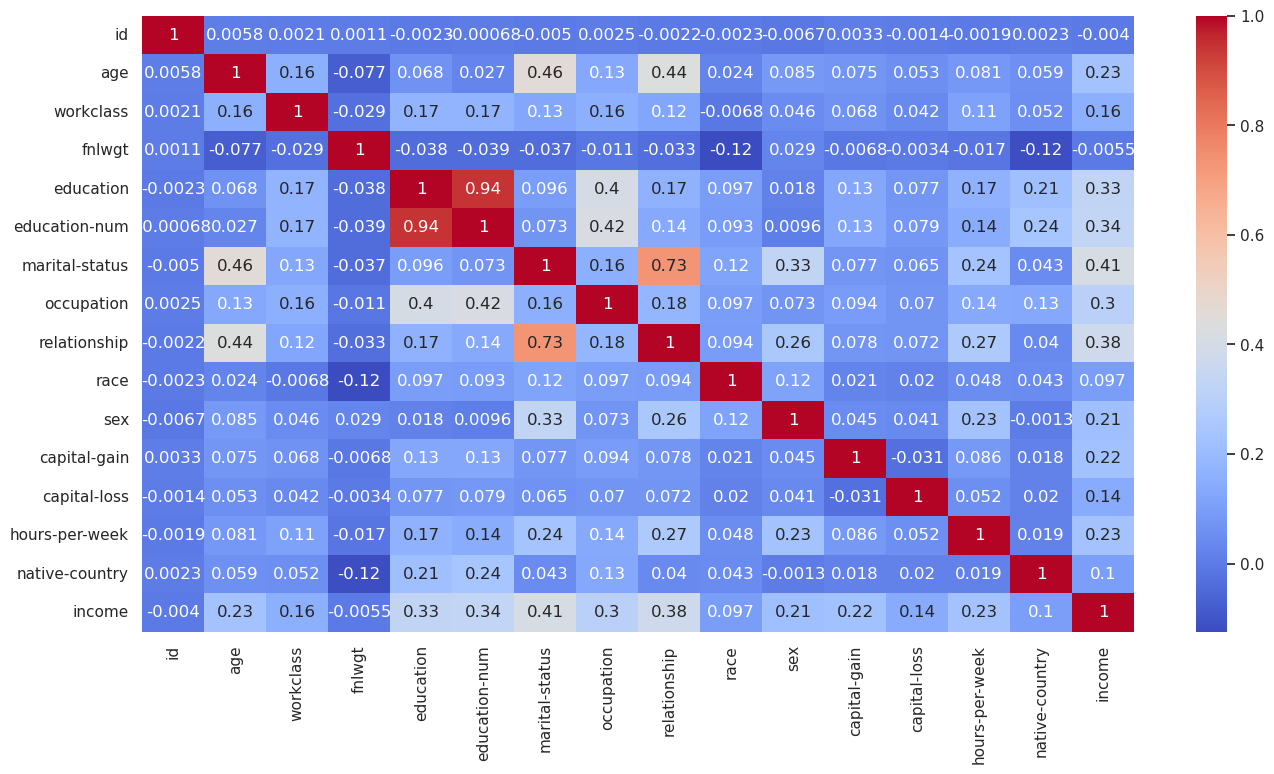

In [19]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [20]:

y = data['income']
x = data.drop('income',axis=1)
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X = minmax.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [22]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

In [23]:
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8624354099639271
